## Optimizing the number of centroids

*  Centroids are difficult to interpret, and it can also be very difficult to determine whether
we have the correct number of centroids. 
*  It's important to understand whether your data
is unlabeled or not as this will directly influence the evaluation measures we can use.

*  Evaluating the model performance for unsupervised techniques is a challenge. 
*  Consequently,
sklearn has several methods to evaluate clustering when a ground truth is known, and very
few for when it isn't.


#### Getting ready
We'll start with a single cluster model and evaluate its similarity. This is more for the purpose
of mechanics as measuring the similarity of one cluster count is clearly not useful in finding
the ground truth number of clusters.
#### Implementation
To get started we'll create several blobs that can be used to simulate clusters of data:


In [9]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot  as plt 

%matplotlib inline

blobs, classes = make_blobs(500, centers=3)


from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(blobs)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)




#### Silhouette Distance
First, we'll look at silhouette distance. 



*  Silhouette distance is the ratio of the difference between in-cluster dissimilarity, the closest out-of-cluster dissimilarity, and the maximum of these two values. 
*  It can be thought of as a measure of how separate the clusters are.


Let's look at the distribution of distances from the points to the cluster centers; it's useful
to understand silhouette distances:


In [10]:
from sklearn import metrics
silho_samples = metrics.silhouette_samples(blobs,
kmean.labels_)

np.column_stack((classes[:5], silho_samples[:5]))


array([[ 2.        ,  0.37654352],
       [ 2.        ,  0.66065306],
       [ 1.        ,  0.60852844],
       [ 2.        ,  0.54331681],
       [ 0.        ,  0.75363633]])

(array([   8.,   12.,   17.,   19.,   35.,   52.,   83.,  115.,   36.,  123.]),
 array([ 0.01024717,  0.09493222,  0.17961728,  0.26430234,  0.3489874 ,
         0.43367246,  0.51835752,  0.60304258,  0.68772763,  0.77241269,
         0.85709775]),
 <a list of 10 Patch objects>)

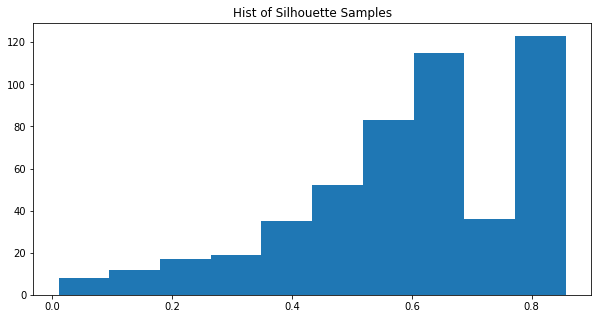

In [11]:
f, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Hist of Silhouette Samples")
ax.hist(silho_samples)




Notice that generally the higher the number of coefficients are closer to 1 (which is good)
the better the score.

In [ ]:
#### How it works}
The average of the silhouette coefficients is often used to describe the entire model's fit:

\begin{verbatim}
silho_samples.mean()
0.57130462953339578
\end{verbatim}

It's very common; in fact, the metrics module exposes a function to arrive at the value we
just got:

\begin{verbatim}
metrics.silhouette_score(blobs, kmean.labels_)
0.57130462953339578
\end{verbatim}

Now, let's fit the models of several cluster counts and see what the average silhouette score
looks like:



/home/nbuser/anaconda3_431/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


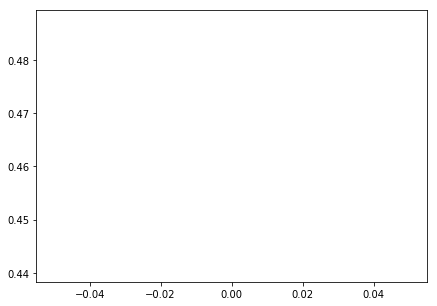

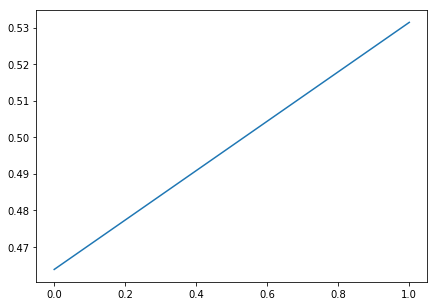

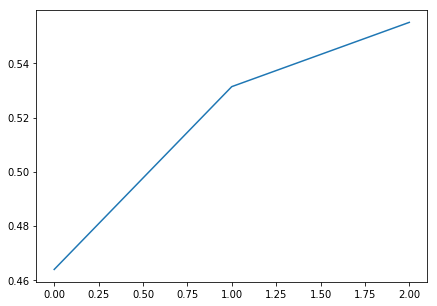

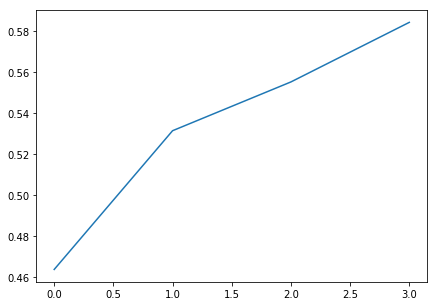

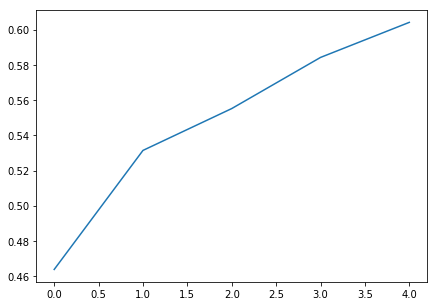

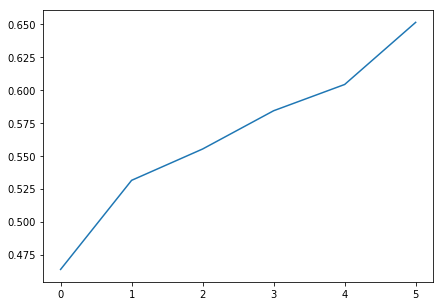

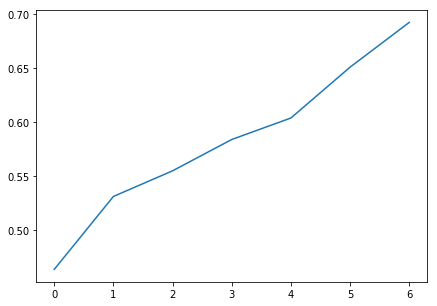

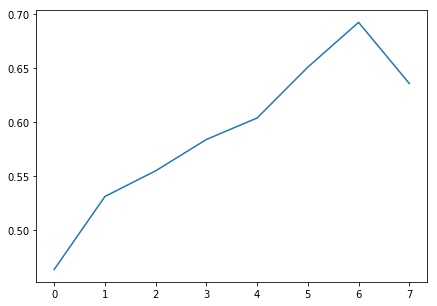

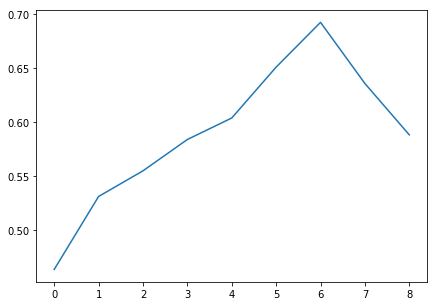

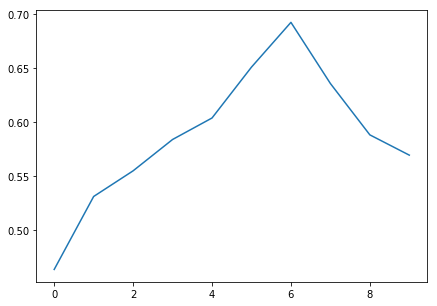

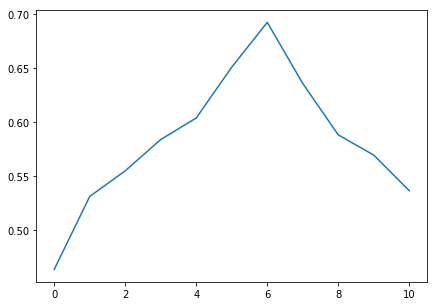

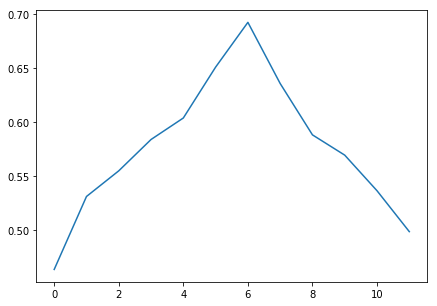

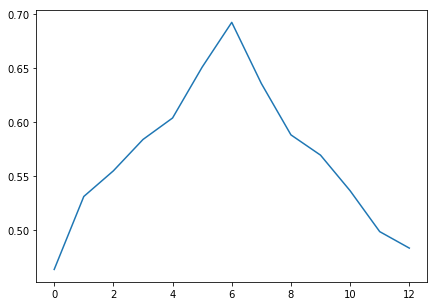

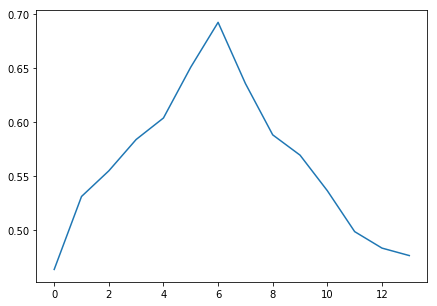

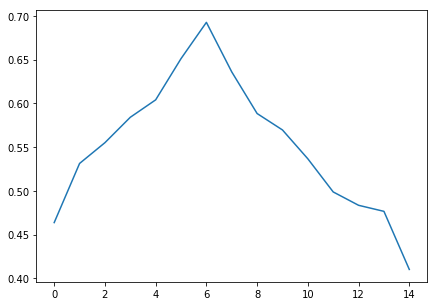

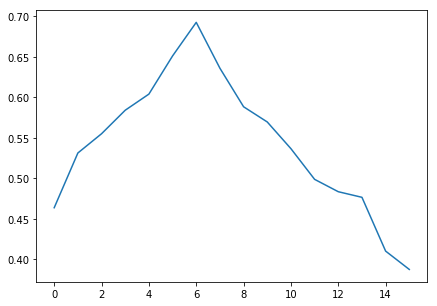

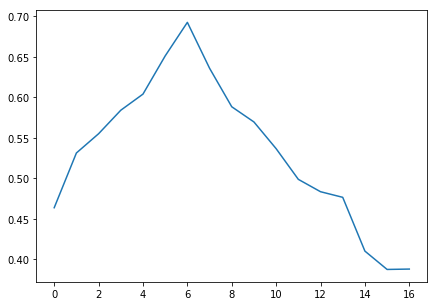

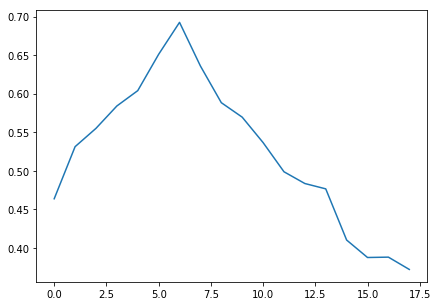

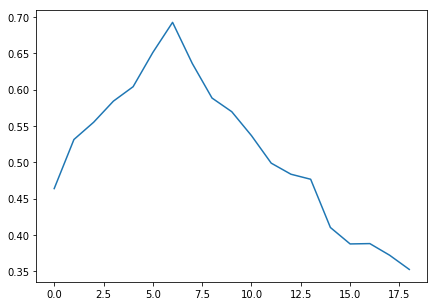

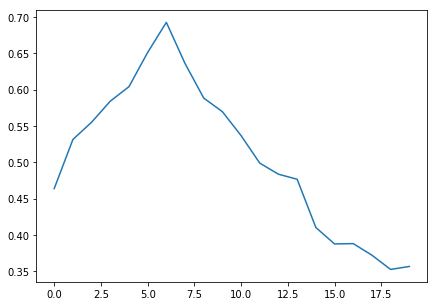

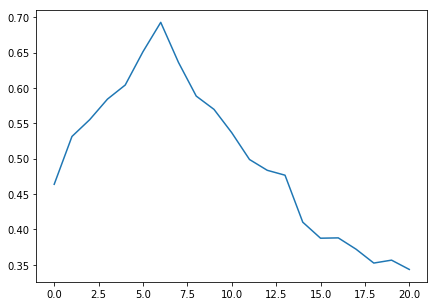

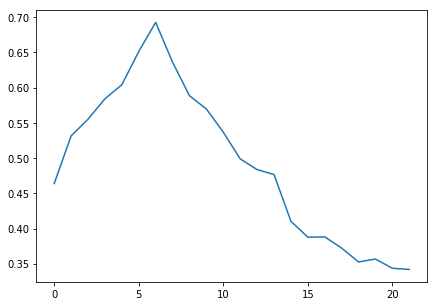

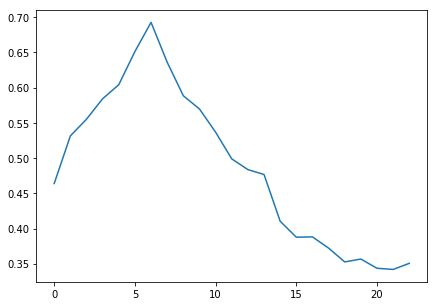

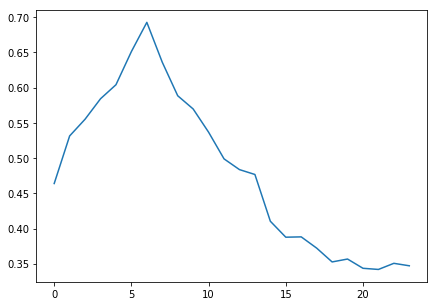

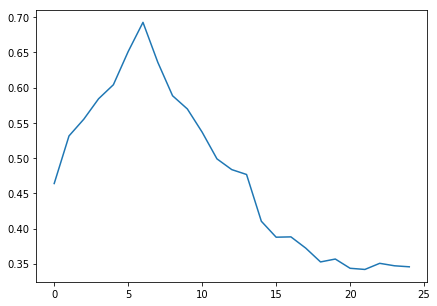

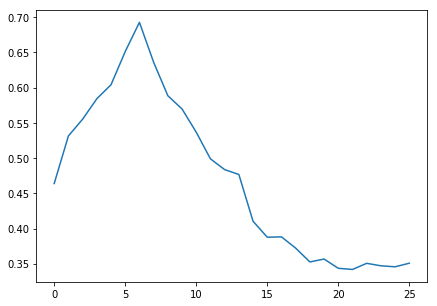

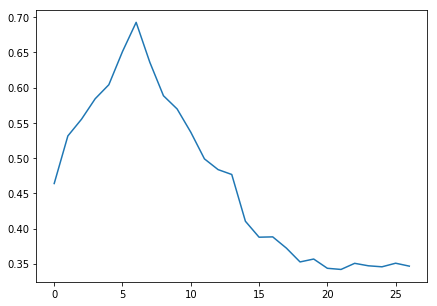

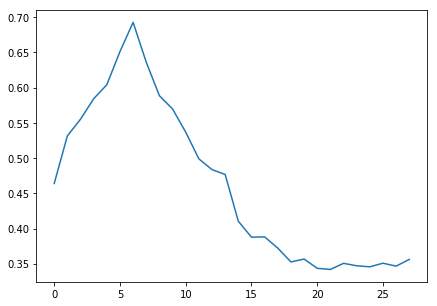

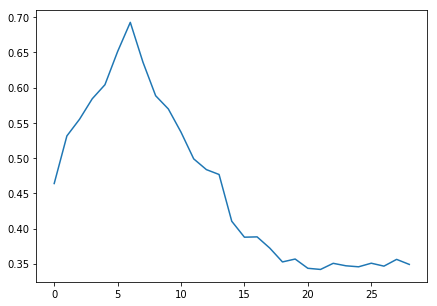

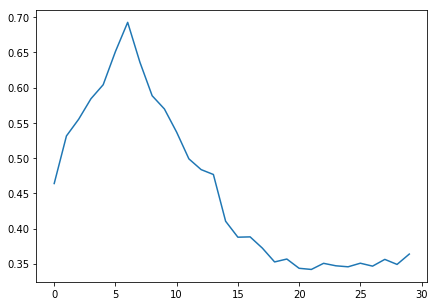

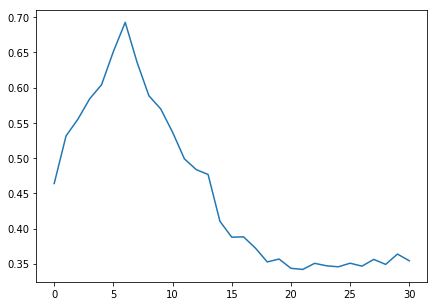

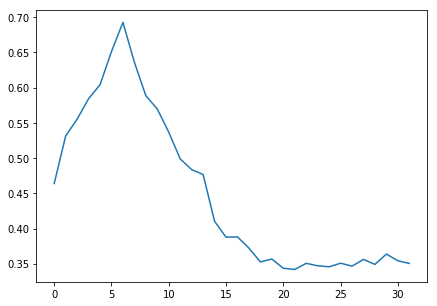

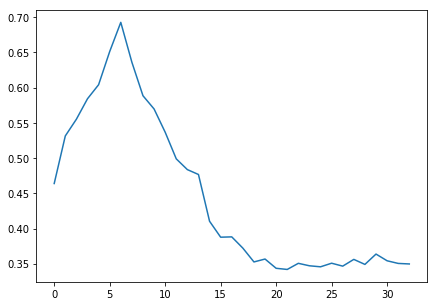

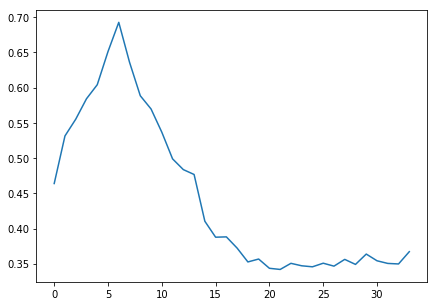

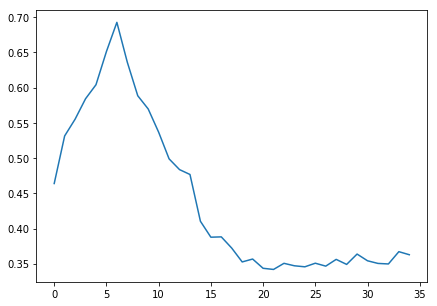

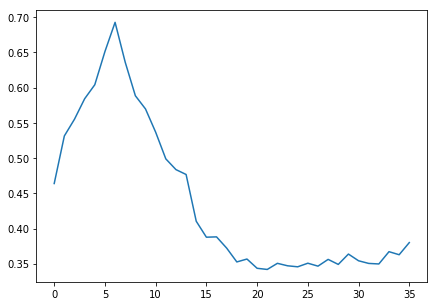

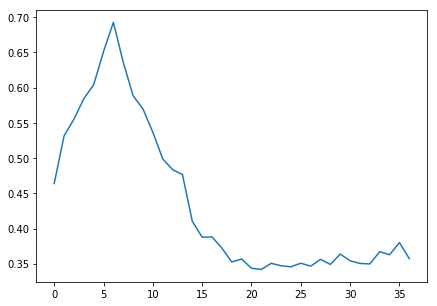

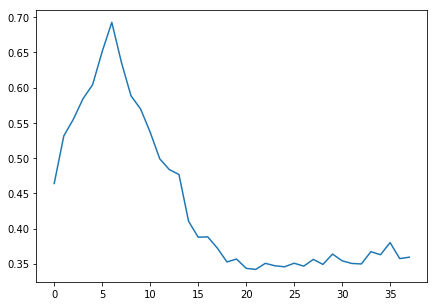

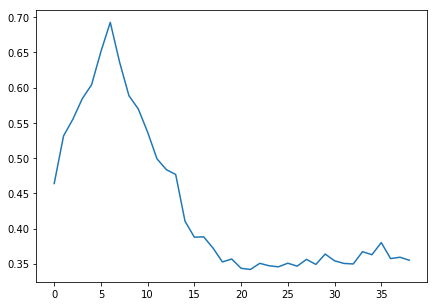

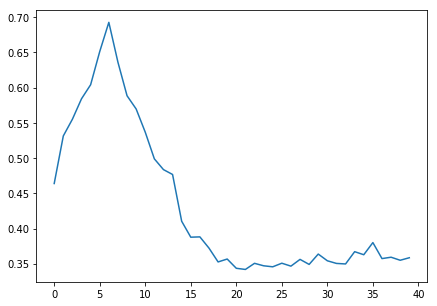

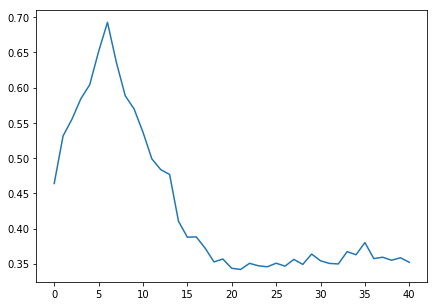

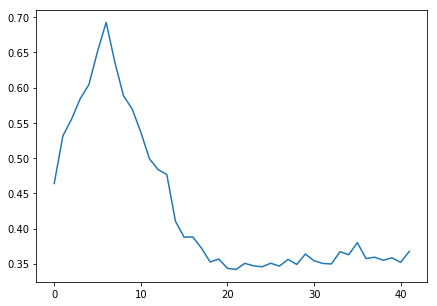

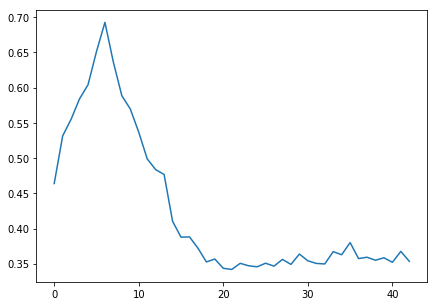

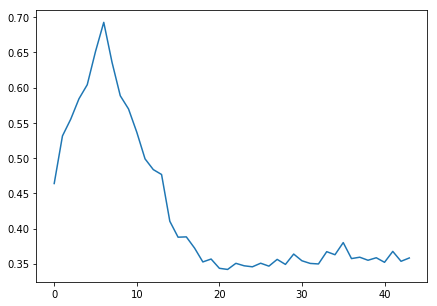

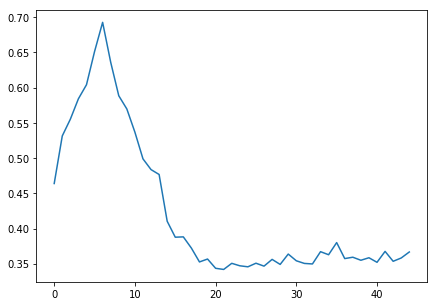

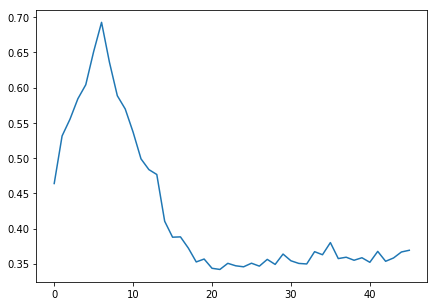

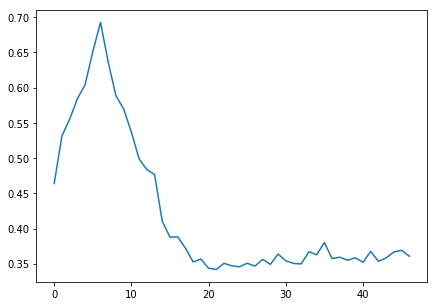

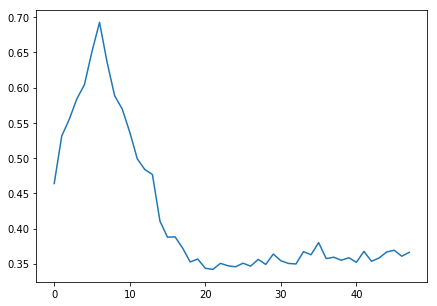

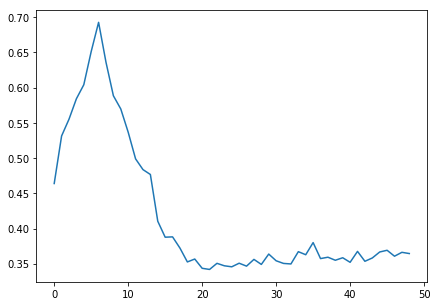

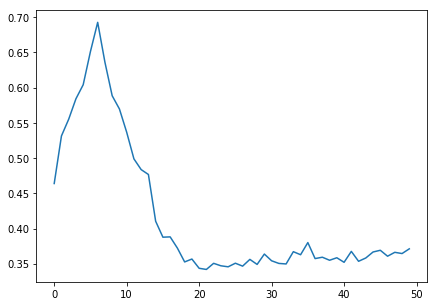

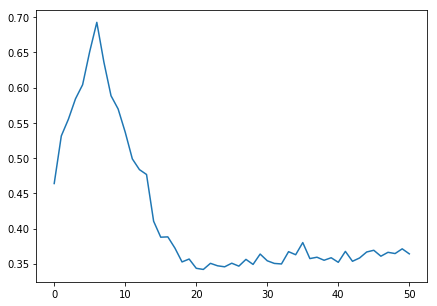

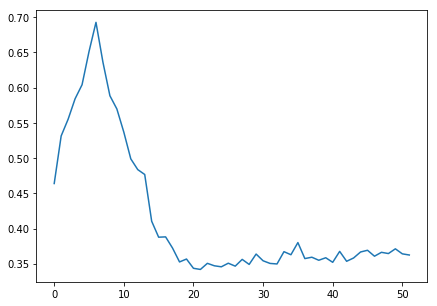

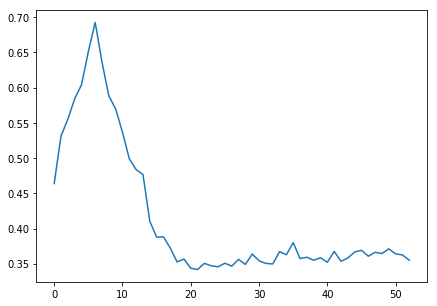

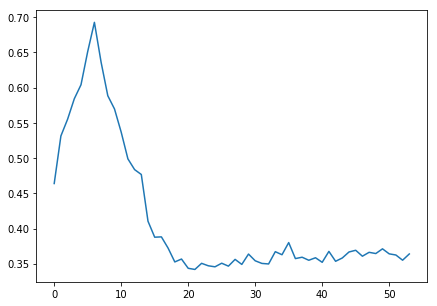

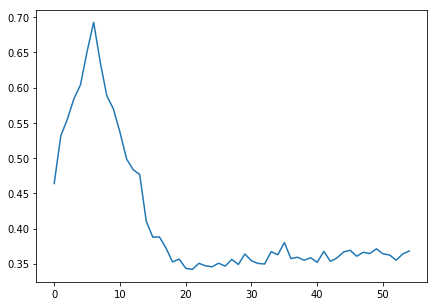

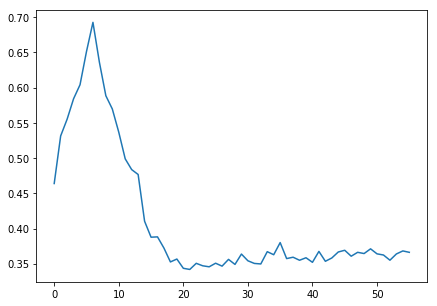

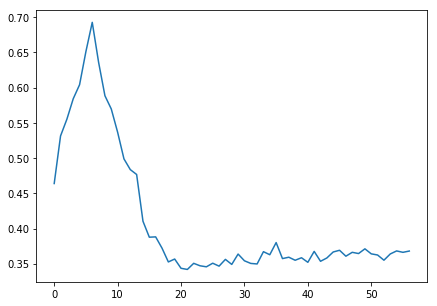

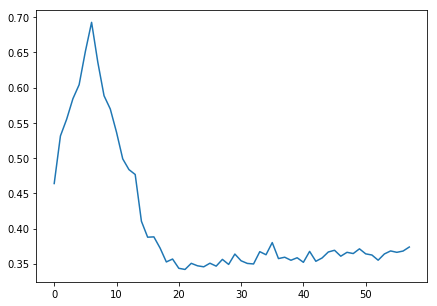

In [13]:

# first new ground truth
blobs, classes = make_blobs(500, centers=10)
sillhouette_avgs = []
# this could take a while
for k in range(2, 60):
    kmean = KMeans(n_clusters=k).fit(blobs)
    sillhouette_avgs.append(metrics.silhouette_score(blobs,kmean.labels_))
    f, ax = plt.subplots(figsize=(7, 5))
    ax.plot(sillhouette_avgs)


In [14]:

The following is the output:
\begin{figure}[h!]
\centering
\includegraphics[width=0.99\linewidth]{images/SKL30-Silho-2}
\end{figure}

%========================================================%
%Chapter 3
%93



SyntaxError: invalid syntax (<ipython-input-14-f70103ebe26d>, line 2)

*  This plot shows that the silhouette averages as the number of centroids increase.
*   We can see
that the optimum number, according to the data generating process, is 3, but here it looks like
it's around 6 or 7. 
*  This is the reality of clustering; quite often, we won't get the correct number
of clusters, we can only really hope to estimate the number of clusters to some approximation.

